### Markowitz part 1

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tickers = ['NVDA','NKE']
df = pd.DataFrame()

for i in tickers:
    df[i] = wb.DataReader(i, data_source = 'yahoo', start = '2010-01-01')['Adj Close']


In [3]:
df.head(3)

,NVDA,NKE
Date,,
2010-01-04,17.017818,11.990803
2010-01-05,17.266321,12.038511
2010-01-06,17.376762,11.965116


In [4]:
df.tail(3)

,NVDA,NKE
Date,,
2020-05-12,312.100006,88.260002
2020-05-13,311.200012,86.019997
2020-05-14,314.839996,84.945000


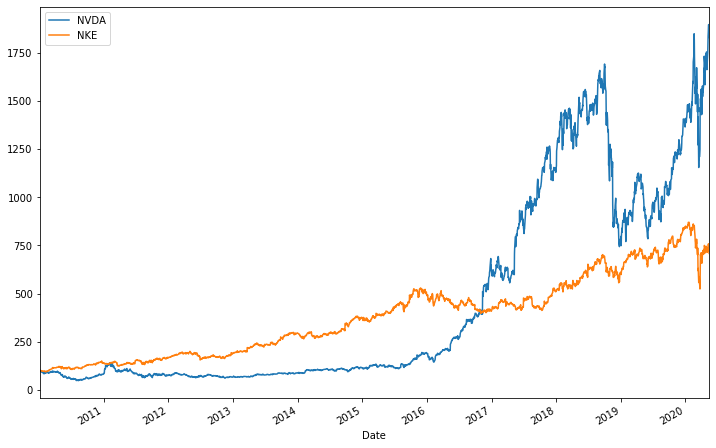

In [15]:
(df / df.iloc[0] * 100).plot(figsize=(12,8))

In [16]:
# Volatilidade

log_retorno = np.log( df / df.shift(1))

In [18]:
# Media de Volatilidade

log_retorno.mean()

NVDA    0.001119
NKE     0.000751
dtype: float64

In [19]:
# Media de Volatilidade anual

log_retorno.mean()*250

NVDA    0.279697
NKE     0.187679
dtype: float64

In [20]:
# Covariancia

log_retorno.cov()

,NVDA,NKE
NVDA,0.000707,0.000168
NKE,0.000168,0.000259


In [23]:
# Correlação

log_retorno.corr()

,NVDA,NKE
NVDA,1.000000,0.391647
NKE,0.391647,1.000000


In [25]:
num_ativos = len(tickers)
num_ativos

2

In [26]:
arr = np.random.random(2)
arr

array([0.7117016 , 0.79119396])

In [27]:
arr[0] + arr[1]

1.502895561894218

In [28]:
peso = np.random.random(num_ativos)
peso = peso / np.sum(peso)
peso

array([0.93236156, 0.06763844])

In [29]:
peso[0] + peso[1]

1.0

### Markowitz part 2

In [37]:
# Retorno Esperado anual

np.sum(peso * log_retorno.mean() ) * 250

0.2734734290780869

In [38]:
# Variancia esperada anual

np.dot(peso.T, np.dot(log_retorno.cov() * 250, peso ))

0.15914442586448682

In [40]:
# Volatilidade anual esperada

np.sqrt( np.dot ( peso.T, np.dot (log_retorno.cov() * 250, peso)))

0.3989290987938669

In [43]:
pfolio_retorno = []
pfolio_volatilidade = []

for x in range (1000):
    peso = np.random.random(num_ativos)
    peso = peso / np.sum(peso)
    pfolio_retorno.append(np.sum(peso * log_retorno.mean() ) * 250)
    pfolio_volatilidade.append(np.sqrt(np.dot(peso.T,np.dot(log_retorno.cov() * 250, peso))))

pfolio_retorno, pfolio_volatilidade

([0.21542653552736535,
  0.23446195273559967,
  0.21910850380018868,
  0.2678716108290529,
  0.22910123560440768,
  0.21827051511988502,
  0.20403674497384644,
  0.21816424451397315,
  0.21336863324604743,
  0.2022877688967525,
  0.2377641940931585,
  0.229355890466241,
  0.23329976778991499,
  0.2653095025509899,
  0.22516107370529975,
  0.19293408493093098,
  0.21131218757506634,
  0.1987495944229213,
  0.23618235656563344,
  0.2355766833175795,
  0.2528263003211117,
  0.2537156678178446,
  0.2210125616923689,
  0.2727155078339264,
  0.2576539443672618,
  0.25412078527772386,
  0.26988807238411844,
  0.2591991035165695,
  0.20587987547991338,
  0.21816077767734077,
  0.27651602992024626,
  0.2614794823839162,
  0.19032449909309856,
  0.23489484505499092,
  0.19535666746529615,
  0.19514338024200503,
  0.2336223552971615,
  0.202325566687353,
  0.1974566630691138,
  0.27085259383690247,
  0.20363466422838453,
  0.2662653506430351,
  0.20840956532514873,
  0.2539445447809016,
  0.24008

### Markowitz part 3

In [44]:
carteira = pd.DataFrame({'Retorno':pfolio_retorno, 'Volatilidade':pfolio_volatilidade})

In [51]:
carteira.head(2)

,Retorno,Volatilidade
0,0.215427,0.255491
1,0.234462,0.286766


In [50]:
carteira.tail(2)

,Retorno,Volatilidade
998,0.272372,0.395215
999,0.223399,0.265964


Text(0, 0.5, 'Retorno esperado')

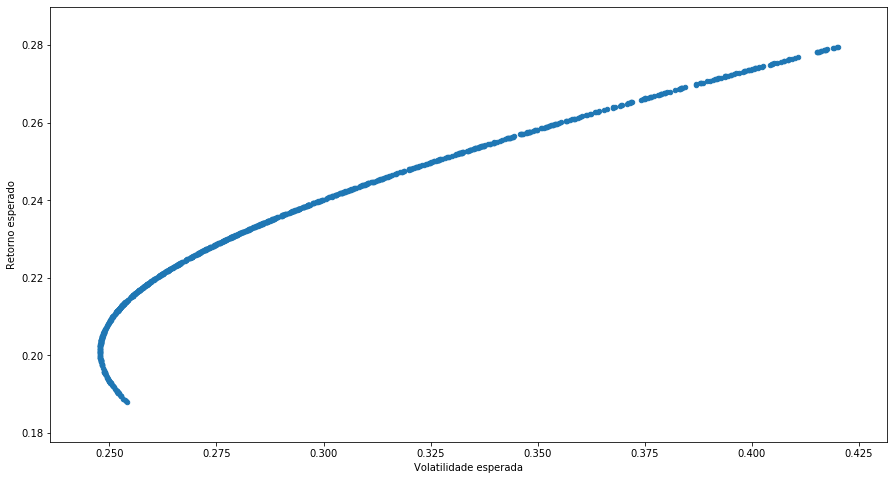

In [55]:
carteira.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(15, 8));
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')